In [22]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from Simulation import *

env, observations_probabilities = generate_new_environment()

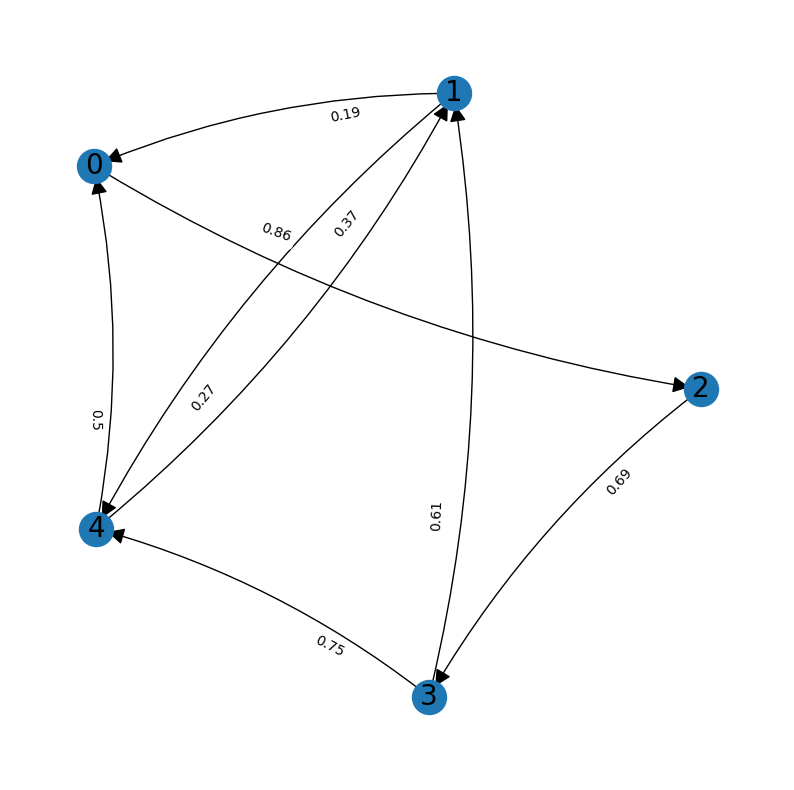

In [24]:
from Network import *
Network.print_graph(env.get_network().G)

In [25]:
ecomm = Ecommerce(B_cap, budgets, product_prices)

In [26]:
nodes_activation_probabilities, num_items_sold = estimate_nodes_activation_probabilities(
            env.network.get_adjacency_matrix(), env.get_users_reservation_prices(), 
            ecomm.product_prices, observations_probabilities
        )


In [27]:
exp_clicks = env.estimate_expected_user_alpha(ecomm.budgets / ecomm.B_cap)

optimal_allocation = ecomm.solve_optimization_problem(
    env.get_network().get_adjacency_matrix(), num_items_sold, 
    env.get_users_reservation_prices(), exp_clicks, nodes_activation_probabilities
    )


optimal solution found is: [40. 60. 40. 60.  0.]


In [28]:
from Ecommerce4 import*

In [54]:
n_experiments = 2
T = 10

In [36]:
# -----------STEP 4------------
gpts_rewards_per_experiment = []
gpucb_rewards_per_experiment = []

gpts_sold_items_per_experiment = []
gpucb_sold_items_per_experiment = []

for e in tqdm(range(0, n_experiments), position=0, desc="n_experiment", leave=False):
    env, observations_probabilities = generate_new_environment()

    ecomm4_gpts = Ecommerce4_GPTS(
        B_cap, budgets, product_prices)
    ecomm4_ucb = Ecommerce4_GPUCB(
        B_cap, budgets, product_prices)

    for t in tqdm(range(0, T), position=1, desc="n_iteration", leave=False):
        arm = ecomm4_ucb.pull_arm()
        reward, sold_items = env.round_step4(arm)
        ecomm4_ucb.update(arm, reward, sold_items)

        arm = ecomm4_gpts.pull_arm()
        reward, sold_items = env.round_step4(arm)
        ecomm4_gpts.update(arm, reward, sold_items)

    gpucb_rewards_per_experiment.append(ecomm4_ucb.collected_rewards)
    gpts_rewards_per_experiment.append(ecomm4_gpts.collected_rewards)

    gpts_sold_items_per_experiment.append(ecomm4_gpts.collected_sold_items)
    gpucb_sold_items_per_experiment.append(ecomm4_ucb.collected_sold_items)



In [55]:
opt = 



In [66]:
def plot_regrets_step3(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opt):
    gpts_rewards_per_experiment = np.array(gpts_rewards_per_experiment)
    gpucb_rewards_per_experiment = np.array(gpucb_rewards_per_experiment)

    # this np.mean is used to compute the average regret for each "product" -> output shape = (n_experiments x NUM_OF_PRODUCTS)
    gpts_regret_arms = np.zeros_like(gpts_rewards_per_experiment)
    gpucb_regret_arms = np.zeros_like(gpucb_rewards_per_experiment)

    for i in range(n_experiments):
        gpts_regret_arms[i] = (opt - gpts_rewards_per_experiment[i].T).T
        gpucb_regret_arms[i] = (opt - gpucb_rewards_per_experiment[i].T).T

    gpts_regret = np.cumsum(np.sum(np.mean(gpts_regret_arms, axis=0), axis = 0))
    gpucb_regret = np.cumsum(np.sum(np.mean(gpucb_regret_arms, axis=0), axis=0))

    #gpts_regret_items = num_items_sold - np.array(gpts_sold_items_per_experiment)


    plot_regrets(gpts_regret, gpucb_regret)


In [67]:
plot_regrets_step3(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, np.sum(env.get_users_alpha(), axis=0)[1:])

ValueError: operands could not be broadcast together with shapes (5,) (10,5,2) 

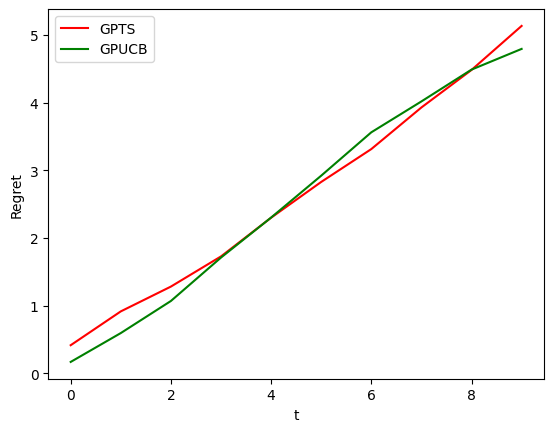

In [62]:
gpts_sold_items_per_experiment = np.array(gpts_sold_items_per_experiment)
gpucb_sold_items_per_experiment = np.array(gpucb_sold_items_per_experiment)

In [63]:
gpts_sold_items_per_experiment.shape

(2, 5, 10)